<a href="https://colab.research.google.com/github/Likhitha0510/TCS-iON-RIO-45/blob/main/Main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [23]:
# Written by : Ritik Bhandari
# Contact : bhandariritik08@gmail.com
# RIO-45: Automate detection of different emotions from textual comments and feedback 

import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import numpy as np

## Importing Dataset

In [24]:
# Loading IMDB data set, we will be using preprocessed dataset
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k',split = (tfds.Split.TRAIN, tfds.Split.TEST),as_supervised = True,with_info = True)

## Feature Scaling

In [25]:
# Modeling, Text encoder can convert any string into integers.
encoder = info.features['text'].encoder
print ('Vocabulary size: {}'.format(encoder.vocab_size))
for train_example, train_label in train_data.take(2):
  print('Encoded text:', train_example[:11].numpy())
  print('Label:', train_label.numpy())


Vocabulary size: 8185
Encoded text: [  62   18   41  604  927   65    3  644 7968   21   35]
Label: 0
Encoded text: [  12   31   93  867    7 1256 6585 7961  421  365    2]
Label: 0


In [26]:
#Prediction Functions

BUFFER_SIZE = 1000

train_batches = (train_data.shuffle(BUFFER_SIZE).padded_batch(38))

test_batches = (test_data.padded_batch(38))

In [27]:

# Model definition

model = keras.Sequential([keras.layers.Embedding(encoder.vocab_size, 20),keras.layers.GlobalAveragePooling1D(),keras.layers.Dense(1)])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 20)          163700    
                                                                 
 global_average_pooling1d_1   (None, 20)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 163,721
Trainable params: 163,721
Non-trainable params: 0
_________________________________________________________________


## Compiling Model and Training Model

In [28]:
# Compiling the model
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
# Training the model
history = model.fit(train_batches,epochs = 15,validation_data = test_batches,validation_steps = 50)


Epoch 1/15
658/658 [==============================] - 6s 8ms/step - loss: 0.6833 - accuracy: 0.5002 - val_loss: 0.6655 - val_accuracy: 0.4947
Epoch 2/15
658/658 [==============================] - 5s 8ms/step - loss: 0.6268 - accuracy: 0.5450 - val_loss: 0.5930 - val_accuracy: 0.5858
Epoch 3/15
658/658 [==============================] - 5s 8ms/step - loss: 0.5503 - accuracy: 0.6519 - val_loss: 0.5258 - val_accuracy: 0.7216
Epoch 4/15
658/658 [==============================] - 5s 8ms/step - loss: 0.4824 - accuracy: 0.7416 - val_loss: 0.4730 - val_accuracy: 0.7963
Epoch 5/15
658/658 [==============================] - 5s 8ms/step - loss: 0.4291 - accuracy: 0.7963 - val_loss: 0.4317 - val_accuracy: 0.8153
Epoch 6/15
658/658 [==============================] - 5s 8ms/step - loss: 0.3877 - accuracy: 0.8289 - val_loss: 0.4010 - val_accuracy: 0.8189
Epoch 7/15
658/658 [==============================] - 5s 8ms/step - loss: 0.3542 - accuracy: 0.8499 - val_loss: 0.3795 - val_accuracy: 0.8474
Epoch 

## Loss And Accuracy of the Model 

In [29]:
# Validation of Loss and Accuracy
loss, accuracy = model.evaluate(test_batches)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

658/658 [==============================] - 2s 3ms/step - loss: 0.3105 - accuracy: 0.8692
Loss:  0.31045305728912354
Accuracy:  0.8691999912261963


In [30]:
# Taking care of the mask
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

### Prediction Function 

In [31]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  print("Prediction Score: ", predictions)
  output = ""
  if predictions[0][0] >= 0.5: output = "POSITIVE"
  elif predictions[0][0] <= -1: output = "NEGATIVE"
  else: output = "NEUTRAL"

  return output

#### Predicting input1 

In [32]:
# Observing the output
sample_pred_text = ('What an excellent performance')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 42ms/step
Prediction Score:  [[122.74198]]
POSITIVE


#### Predicting input2 

In [34]:
sample_pred_text = ('The performance was worst just a waste of money ')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 39ms/step
Prediction Score:  [[-234.94653]]
NEGATIVE


#### Predicting input3

In [35]:
sample_pred_text = ('Moderate it was ok ok tmr it might be good c u n8')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 39ms/step
Prediction Score:  [[20.59399]]
POSITIVE


#### Predicting input4

In [37]:
sample_pred_text = ("""" Season 4 - Stuck in a Rut Script
westsideschl1 January 2021
1. Overacted like reciting highly scripted very fake dialogue, 
and all in sequence as if after every short line the director pauses to allow the actors to memorize the next line.
And, of course, practice a devilish smile. 
2. Over reliance on romance issues with the usual eye candy actors. 
Lucifer, of course, has short beard growth (very manly fake) as if the devil really needs that along with muscles (shown frequently).
Why for someone with God like super powers. To showcase the body we have a very fake (and overused) holding up a car as it's wheels spin in trying to get away.
3. The usual 10 seconds of staged dead body scene (very cheaply popular in crime series); the usual interdepartmental detective conflicts & issues. 4. Special effects consist mostly of two cheap (thankfully always brief) film items: Colored eyes (seen in all superpower movies), 
  and wings that are so cheap they would fall apart if moved. 5. Hell looked like a studio CGI quickie: A background of trees; above are clouds; 
  the throne is a jagged rock nestled amongst other fake jagged rocks. Huh! Not the Hell I know. 
Anyway, gotta have a King to sit there to stop (contain) the demons of Hell from coming to Earth. 
Please, send the demons, they would be a lot more interesting than this script.""""")

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 23ms/step
Prediction Score:  [[-8.908236]]
NEGATIVE


#### Predicting input5

In [38]:
sample_pred_text = ("""""Lucifer should have stayed dead.
John6Daniels20 March 2021
Its just a show the glorifies being a bad person.

Lucifer is hash TV. It go can'd because it was hash then they resurrect her and its still hash.

Overall good quality alone can't save this show.

What can be learned? To glorify negativity.

Verdict: I ain't no Christian but this show is Hell bound...Again... """"")
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 32ms/step
Prediction Score:  [[-14.956689]]
NEGATIVE


#### Predicting input6

In [39]:
sample_pred_text = ("""Lucifer is a great show, a lot of it is the charming and amusing devil we all love to see. 
The strength of this show is the balance it strikes between the detective work and the biblical/divine elements. 
The greatest punch is delivered when one drives the other. 
Lucifer made a strong start and I think the first seasons were it's best. 
Low points include too much of the detective work and less biblical elements, it then resembles CSI more and more. 
You don't want another detective show. Less time should also be devoted to side characters like Maze. 
They are often used as space fillers for no good reason, characters should appear when needed. Overall not too bad. I hope there are more episodes.""")

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

sample_pred_text = ("sorryyyyyy tmr onwards the show's gonna end")

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 25ms/step
Prediction Score:  [[14.712332]]
POSITIVE
1/1 [==============================] - 0s 14ms/step
Prediction Score:  [[-0.97117984]]
NEUTRAL


#### Predicting input7

In [40]:
sample_pred_text = (""""" A devil of a show - Ellis is excellent.
khunkrumark10 February 2016
Tom Ellis was brilliant as the love interest in Miranda - a screwball British comedy - so, check that out for more of him in a comedy role.

He's been an extremely busy actor for the last 15 years but this is the first time he's been let loose on an American audience.

There's nothing particularly original about the premise or the plots... man with a superpower makes everyone around him look like a bloody idiot - but the script and Ellis carry this off so well, that it doesn't matter.

The only danger is will it run out of steam? Will the writers rely on Ellis to carry the show through their inactivity?

For now though, this is the best comedy on TV.
Rating : - 10/10
""""")

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

1/1 [==============================] - 0s 22ms/step
Prediction Score:  [[5.9540095]]
POSITIVE


In [41]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Importing Libraries for plotting graph

In [42]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

## Graph for loss of the model 

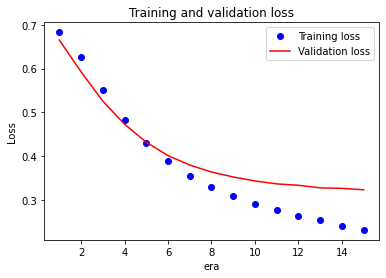

In [44]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid red line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('era')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Graph for accuracy of the model 

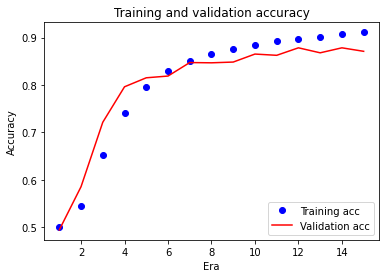

In [45]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Era')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()  